# Plotting for Exploratory data analysis (EDA) of Haberman survivor dataset

## (1) What is the haberman survival dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haber=pd.read_csv("haberman.csv")
import warnings
warnings.filterwarnings("ignore") 
#haberman.csv is the dataset

## (1.1) What is EDA

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. 

### (1.2) Shape of the dataset

In [14]:
print (haber.shape)
print (haber.columns)

(306, 4)
Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')


There are 306 datapoints and 4 features in the dataset

The four features in the dataset are 
* Age: The Age of the patient when the operation is done. The age of the patients in the dataset is between 30 to 83.

* Op_Year (Operation Year): The year in which the operation for the patient is performed. It is only the last two digits of the year.

* axil_nodes (Number of postive axillary nodes): A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.

* Surv_status (Survival status): It can be one of the two values for a patient(1 or 2). 1 = the patient survived five years or longer; 2 = the patient died within five year


# (2)Bivariate analysis
## (2.1)2-D Scatter Plot

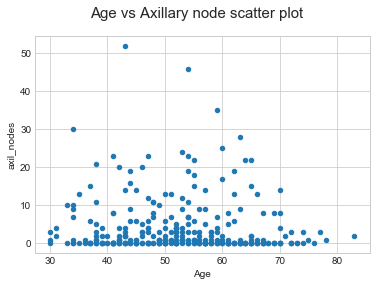

In [17]:
haber.plot(kind='scatter', x='Age', y='axil_nodes') ;
plt.suptitle('Age vs Axillary node scatter plot', fontsize=15)

plt.show();

### Obsevations
The above graph shows the plot between axillary nodes and age. By the graph we can see that the axillary nodes are larger in patients in the age group between 40 to 60.

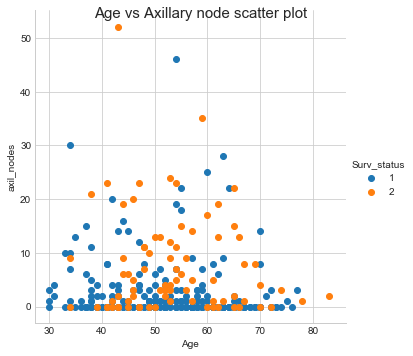

In [16]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="Surv_status", size=5) \
   .map(plt.scatter, "Age", "axil_nodes") \
   .add_legend();
plt.suptitle('Age vs Axillary node scatter plot', fontsize=15)

plt.show();

### Observations

The above graph shows that most patients in the age group of 30 to 40 years survived for more than 5 years after surgery. 

## (2.2)Pair Plot

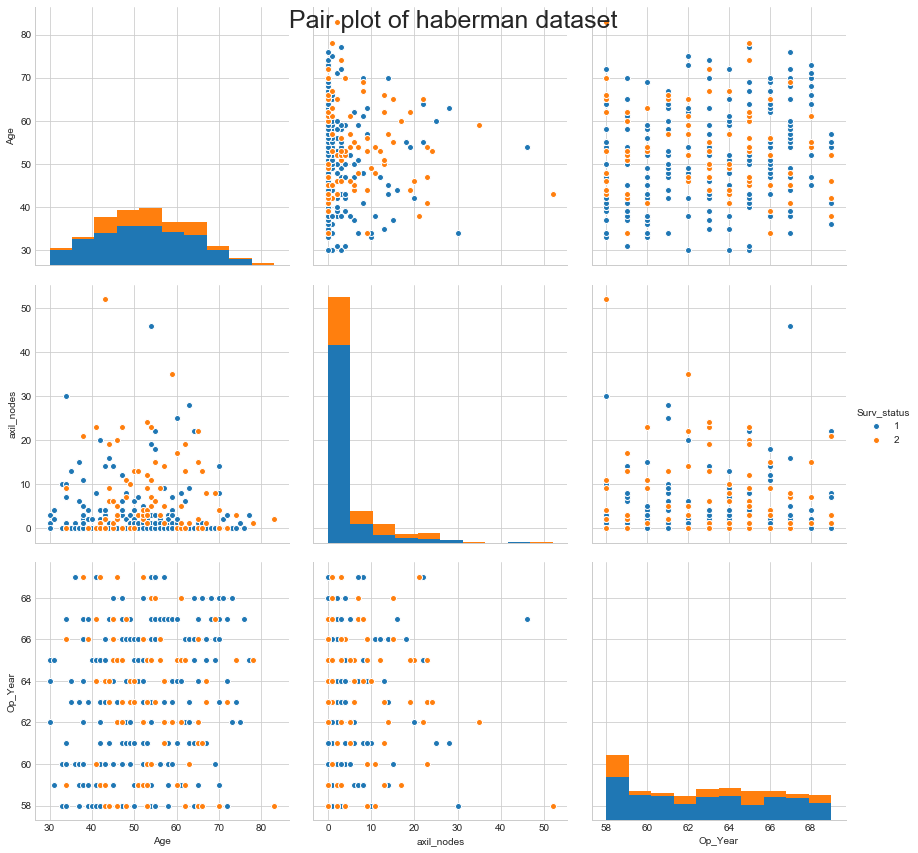

In [40]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haber, hue="Surv_status",vars=['Age','axil_nodes','Op_Year'], size=4);
plt.suptitle('Pair plot of haberman dataset', fontsize=25)
plt.show()

### Observations from Pair plot
1. In the operation year 1958 a larger proportion of patients died within 5 years of surgery.
2. A major proportion of patients have axillary nodes between 0 and 5.

# (3) Univariate analysis
## (3.1)1-D Scatter plot

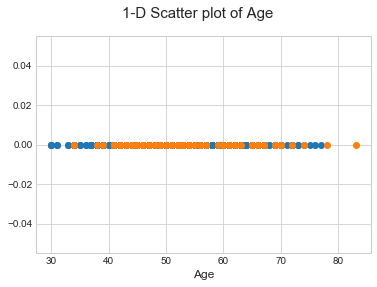

In [30]:
import numpy as np
survstat_one = haber.loc[haber["Surv_status"] == 1];
survstat_two = haber.loc[haber["Surv_status"] == 2];
plt.plot(survstat_one["Age"], np.zeros_like(survstat_one['Age']), 'o')
plt.plot(survstat_two["Age"], np.zeros_like(survstat_two['Age']), 'o')
plt.xlabel('Age',size=12)
plt.suptitle('1-D Scatter plot of Age', fontsize=15)
plt.show()

### Observations

Patients below 40 are more likely to survive for more than 5 years.

## (3.2)PDF(Probability Density Function)

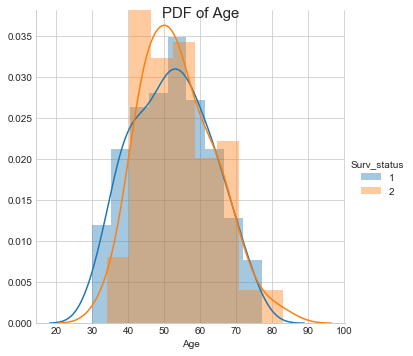

In [31]:
sns.FacetGrid(haber, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.suptitle('PDF of Age', fontsize=15)
plt.show();

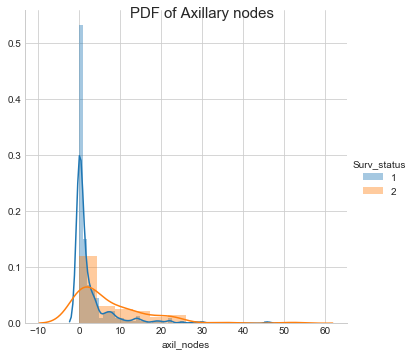

In [33]:
sns.FacetGrid(haber, hue="Surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.suptitle('PDF of Axillary nodes', fontsize=15)
plt.show();

## (3.3)CDF(Cumulative Distributive Function)

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


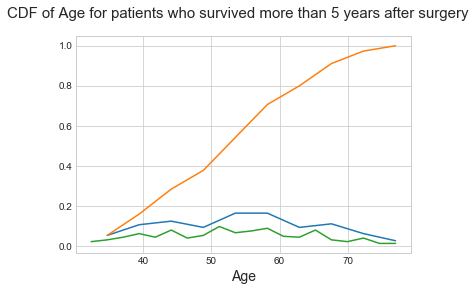

In [34]:
counts, bin_edges = np.histogram(survstat_one['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(survstat_one['Age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.xlabel('Age',fontsize=14)
plt.suptitle('CDF of Age for patients who survived more than 5 years after surgery', fontsize=15)
plt.show();


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


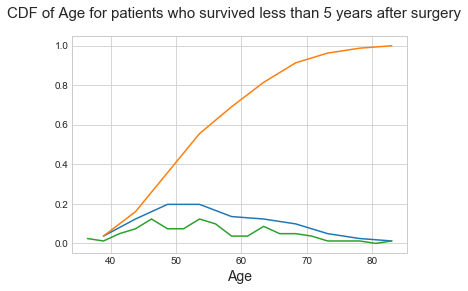

In [35]:
counts, bin_edges = np.histogram(survstat_two['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(survstat_two['Age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.xlabel('Age',fontsize=14)
plt.suptitle('CDF of Age for patients who survived less than 5 years after surgery', fontsize=15)
plt.show();

### Observations

From the above graphs we notice that most patients who are below 40 survive for more than 5 years. 70% of patients who survive for more than 5 years are less than 60 years old.

## (3.4)Mean 

In [16]:
print("Means:")
print(np.mean(survstat_one["axil_nodes"]))
print(np.mean(survstat_two["axil_nodes"]))


print("\nStd-dev:");
print(np.std(survstat_one["axil_nodes"]))
print(np.std(survstat_two["axil_nodes"]))


Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


### Observations
The difference between the mean of axillary nodes of patients who survive for more than five years and patients who survive for less than five years is very large. By this we can conclude that the number of axillary nodes play an important role in determining the survival of the patient.


## (3.5)Box Plot

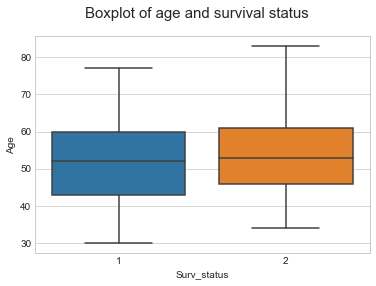

In [37]:
sns.boxplot(x='Surv_status',y='Age', data=haber)
plt.suptitle('Boxplot of age and survival status', fontsize=15)
plt.show()

## (3.6)Violin Plot

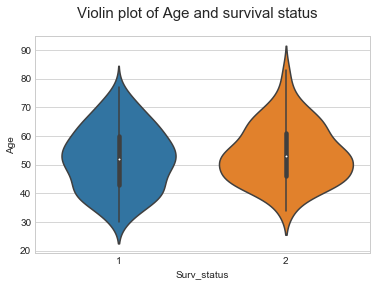

In [36]:
sns.violinplot(x="Surv_status", y="Age", data=haber, size=8)
plt.suptitle('Violin plot of Age and survival status', fontsize=15)
plt.show()

## (4) Conclusions

1. The number of axillary nodes play a important role in determining the survival of a patient. The lower the axillary nodes the longer the patient survives after surgery.
2. Patients below the age of 40 are more likely to survive for more than 5 years after surgery.
3. The median of patients who have breast cancer is 52.
4. A major proportion of patients have axillary nodes between 0 to 5.
